## Seasonality analysis

In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline


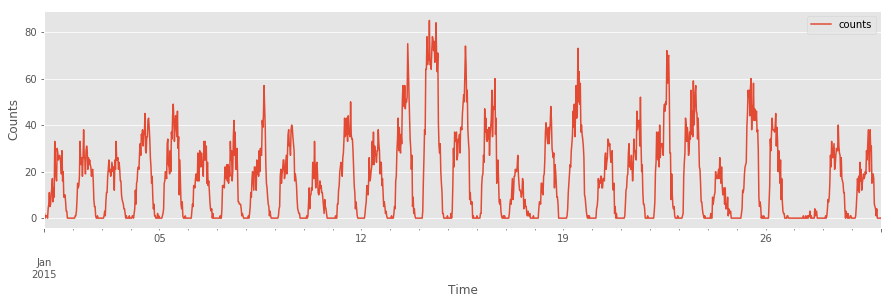

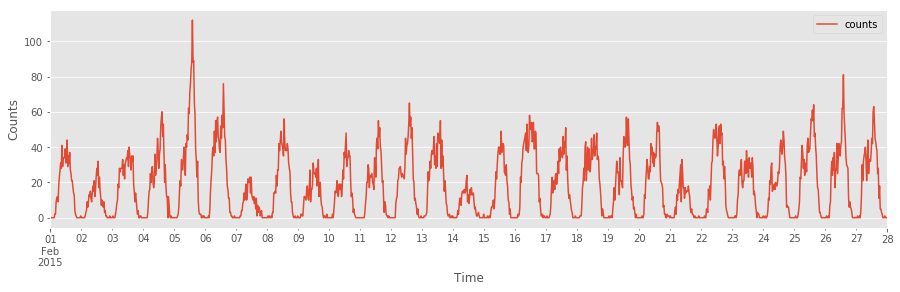

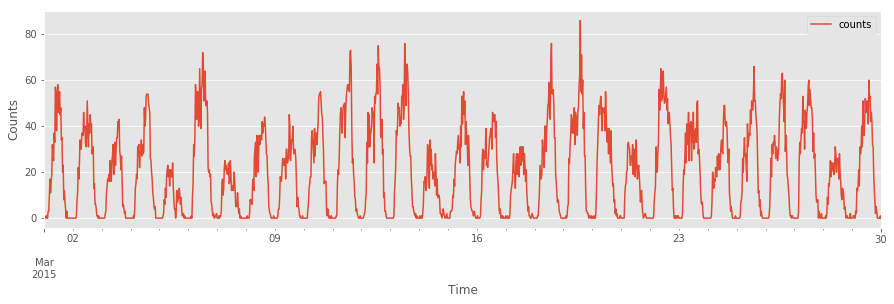

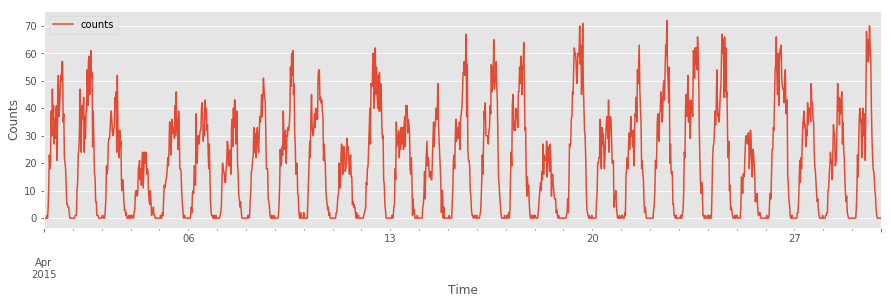

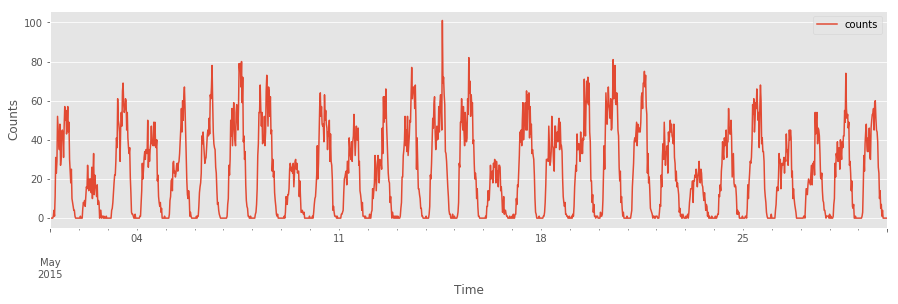

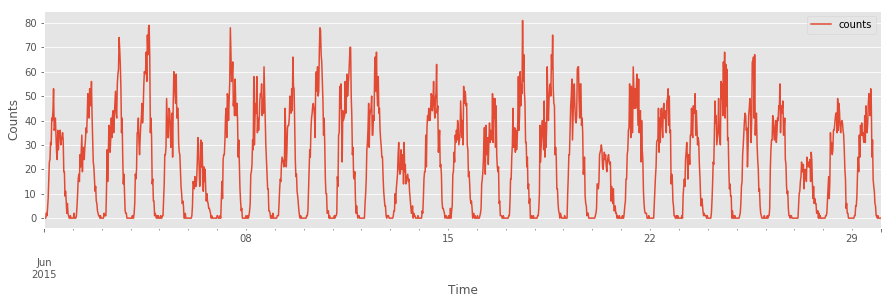

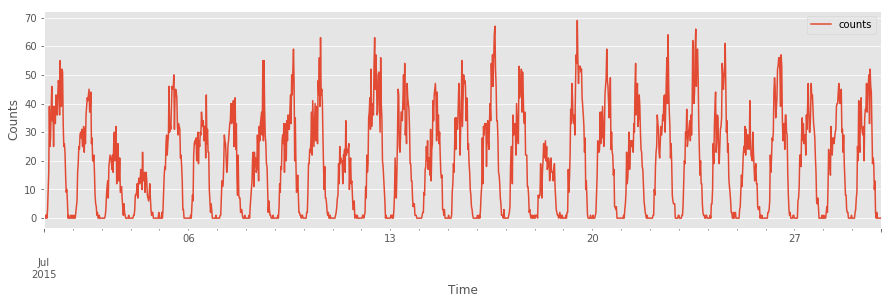

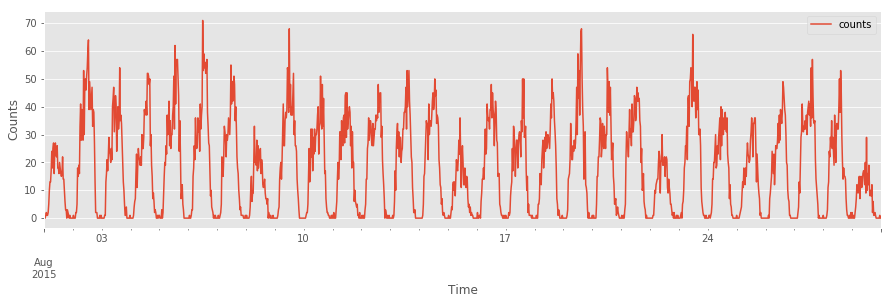

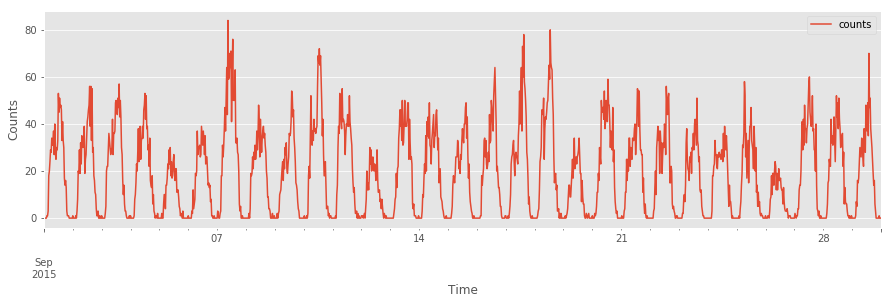

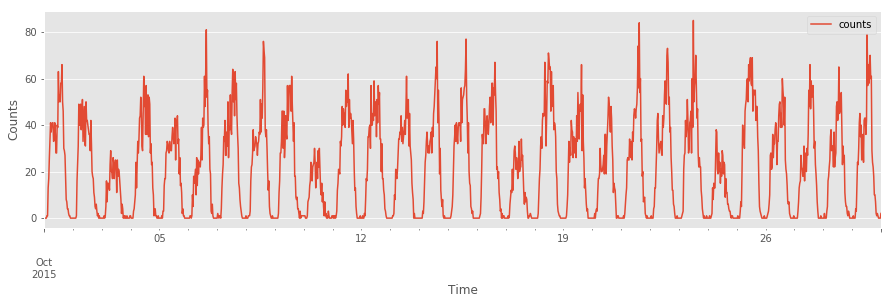

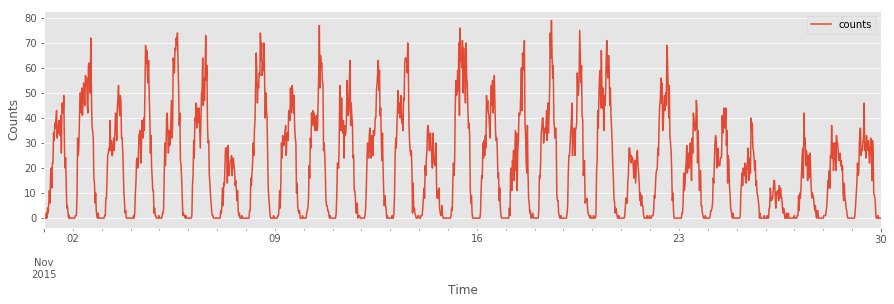

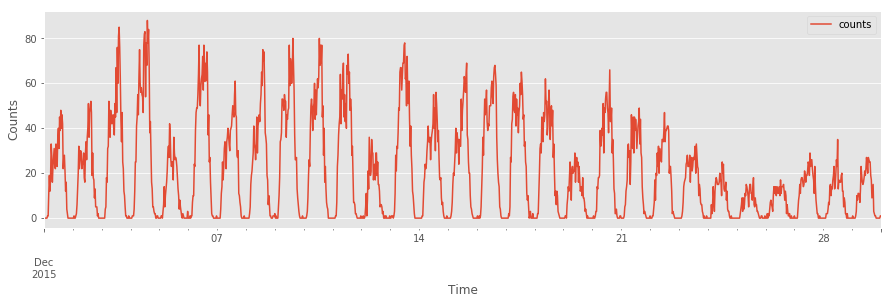

In [2]:
def load_data():

    direc = 'data/OD_matrix.csv.npy'
    data = np.load(direc)

    st = datetime.datetime.strptime("2009-01-01 00:00", "%Y-%m-%d %H:%M")
    ed = datetime.datetime.strptime("2016-06-30 00:00", "%Y-%m-%d %H:%M")
    date_index = pd.date_range(st, ed , freq = '30min').values

    ts = data[16,27,:] 

    df = pd.DataFrame()
    df['counts'] = ts
    df = df.set_index(pd.DatetimeIndex(date_index))
    
    # focus on year 2015
    st = datetime.datetime.strptime("2015-01-01 00:00", "%Y-%m-%d %H:%M")
    ed = datetime.datetime.strptime("2015-12-31 00:00", "%Y-%m-%d %H:%M")

    df = df.loc[st: ed]
    
    return df

def plot_seasonality(df):
    
    for i in range(1,13):
            
        st = "2015-" + str(i) + "-01 00:00"
        ed = "2015-" + str(i) + "-30 00:00"
        
        if i == 2: 
            ed = "2015-" + str(i) + "-28 00:00"

        from_date = datetime.datetime.strptime(st, "%Y-%m-%d %H:%M")
        to_date = datetime.datetime.strptime(ed, "%Y-%m-%d %H:%M")

        df_ = df.loc[from_date: to_date]

        df_.reset_index().plot(x='index', y='counts', figsize=(15,4))
                                        
        plt.xlabel('Time')
        plt.ylabel('Counts')
                    
data = load_data()
plot_seasonality(data)

Seasonal component each day!

### Agregate counts per month

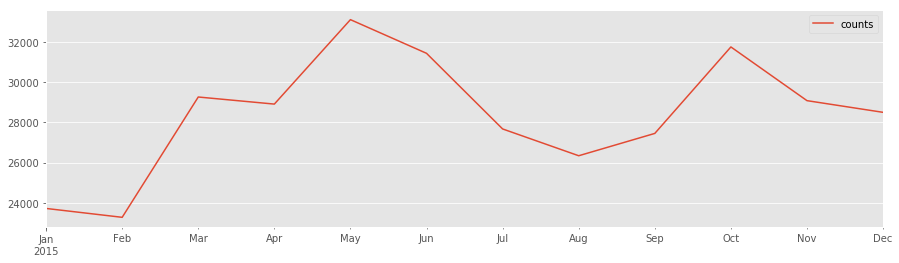

In [3]:
data.groupby(pd.TimeGrouper("M")).sum().plot(figsize=(15,4))

## Remove daily seasonal component

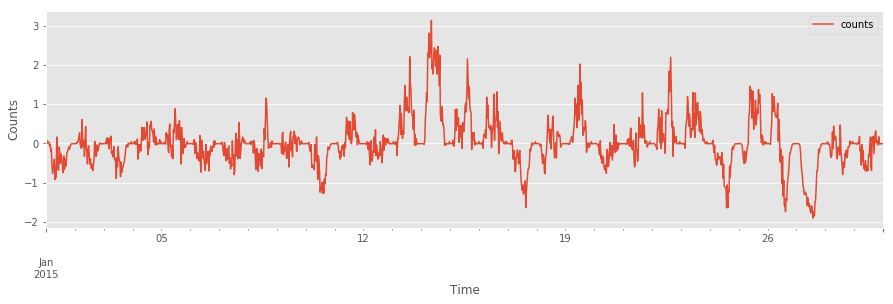

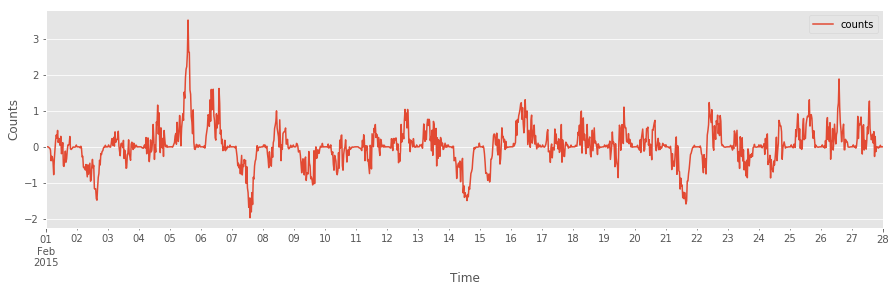

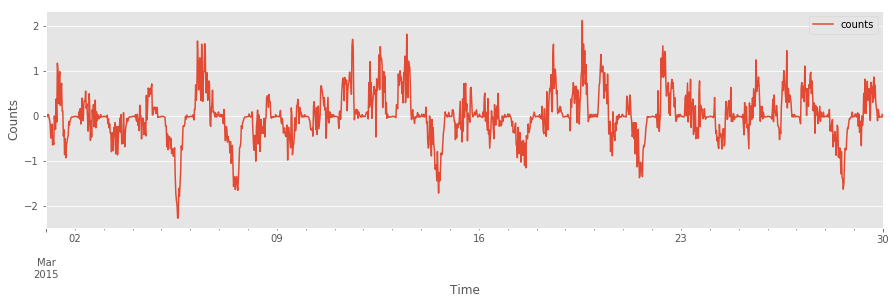

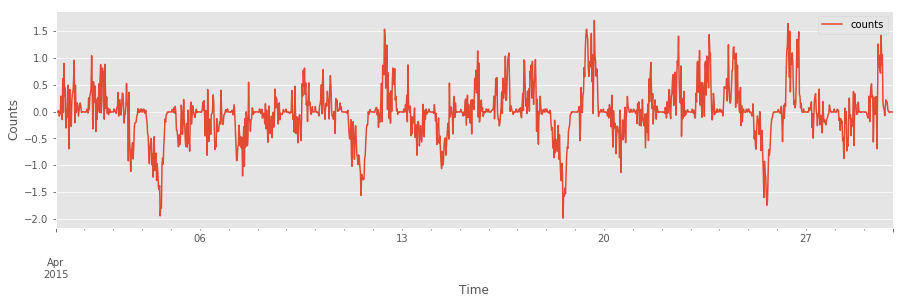

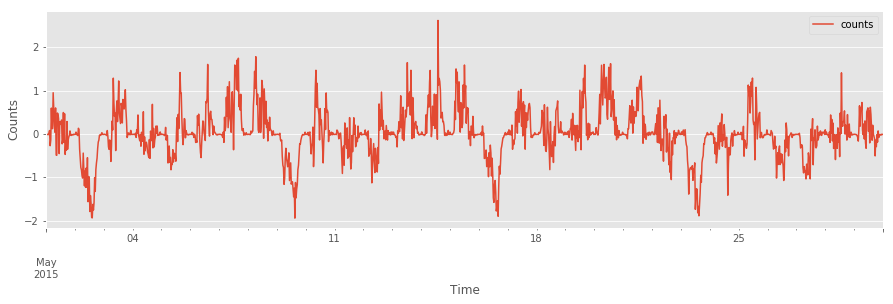

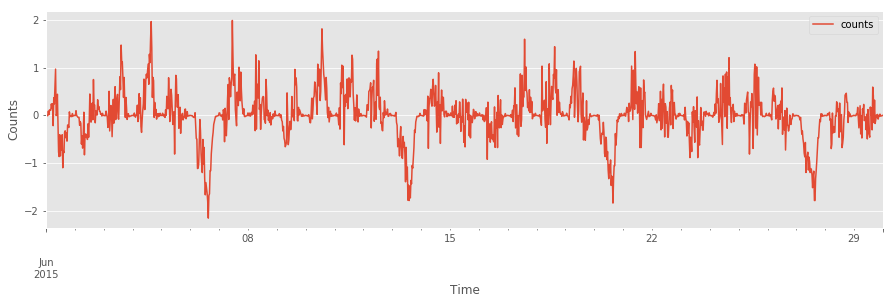

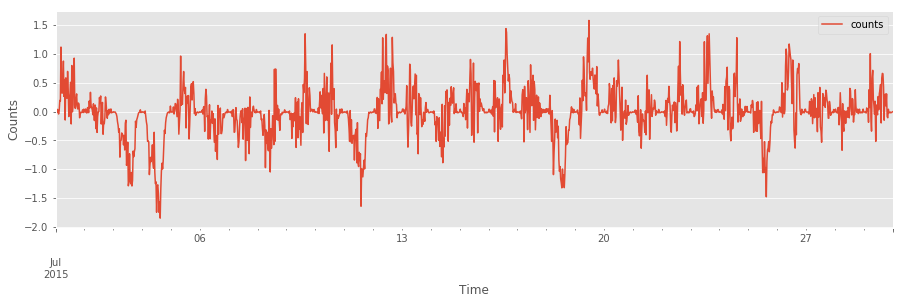

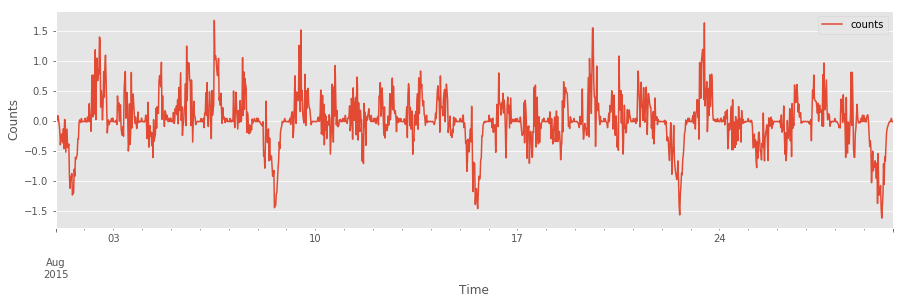

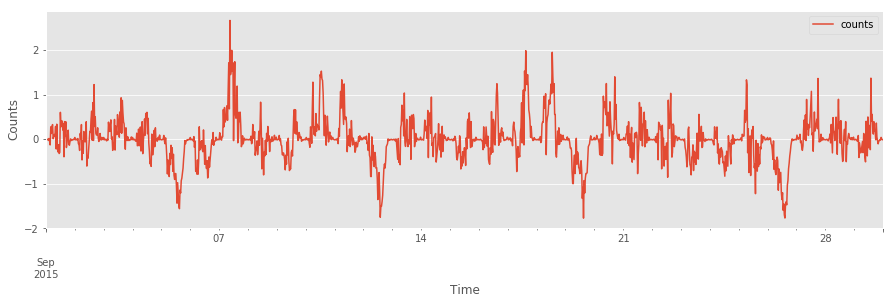

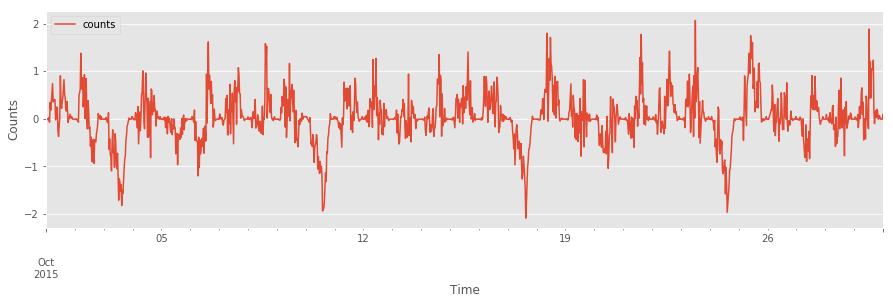

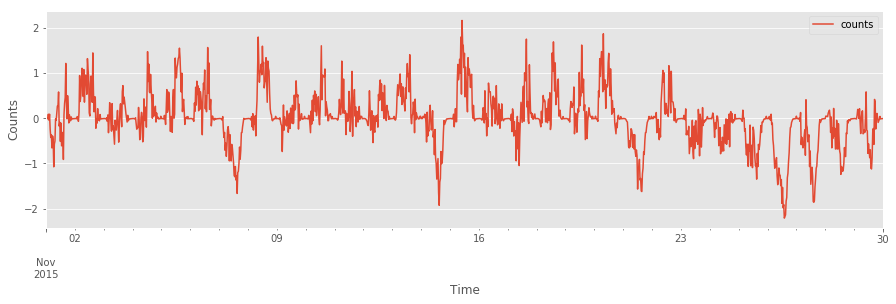

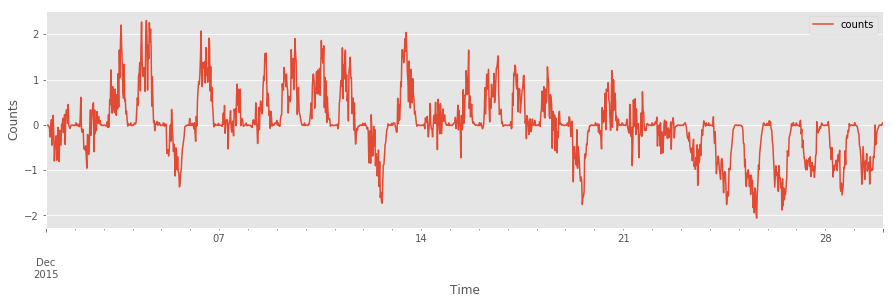

In [4]:
df2 = pd.DataFrame()
df2['Counts'] = data.counts.values
df2['time_of_day'] = [(date.month, date.time()) for date in data.index]

avg = pd.DataFrame(df2.groupby(df2.time_of_day).Counts.mean()).to_dict()
std = np.std(df2.Counts.values)

stationary_ts = []
rmv_std = []
rmv_seasonality = []

for index,item in df2['time_of_day'].iteritems():
    stationary_ts.append((df2.loc[index]['Counts'] - avg['Counts'][item]) / std)
    rmv_std.append(std)
    rmv_seasonality.append(avg['Counts'][item])
    
data['counts'] = stationary_ts
plot_seasonality(data)
